### DATA CLEANING AND TRANSFORMATION 

In [ ]:
Source: https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country/data

In [3]:
#Importing packages 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.chdir("/Users/sbbogdyn/Downloads")

In [4]:
#Loading the dataset
df = pd.read_csv('Salary.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [8]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [5]:
# removing the Race data as it is irrelevant to the problem
df.drop(columns = ['Race'], inplace = True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,0
4,52.0,Male,2,Director,20.0,200000.0,USA,0


In [6]:
#Changing the data types for three columns from float to integer
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df['Salary'] = df['Salary'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6684 non-null   int64 
 1   Gender               6684 non-null   object
 2   Education Level      6684 non-null   int64 
 3   Job Title            6684 non-null   object
 4   Years of Experience  6684 non-null   int64 
 5   Salary               6684 non-null   int64 
 6   Country              6684 non-null   object
 7   Senior               6684 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 417.9+ KB


In [7]:
# Sorting the data by years of experience
df1 = df.sort_values('Years of Experience', ascending = True)
df1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Senior
5115,24,Female,0,Sales Associate,0,25000,UK,0
2505,22,Female,0,Back end Developer,0,51832,USA,0
5758,24,Male,0,Delivery Driver,0,28000,Australia,0
5298,23,Female,0,Receptionist,0,25000,China,0
6069,24,Female,0,Receptionist,0,25000,Canada,0
...,...,...,...,...,...,...,...,...
2471,57,Female,3,Software Engineer Manager,33,191790,China,0
2396,57,Female,3,Software Engineer Manager,33,191790,China,0
2504,57,Female,2,Full Stack Engineer,33,188232,UK,0
2415,60,Female,3,Software Engineer Manager,34,188651,Canada,0


In [8]:
# Looking for distinct values among the salaries
diff_salaries = df1['Salary'].value_counts()
diff_salaries

Salary
140000    287
120000    282
160000    276
55000     251
170000    231
         ... 
99363       1
149198      1
157872      1
91903       1
128712      1
Name: count, Length: 437, dtype: int64

In [9]:
def salary_group(salary):
    '''
salary_group is a function which defines whether a person belong to:
lower salary bracket (less than 25000), 
middle salary bracket (25000-75000),
upper salary bracket (>75000)
'''
    if salary < 25000:
        return '<25000'
    elif 25000 <= salary < 75000:
        return '<25000,75000>'
    else:
        return '>75000'

# Creating a new column 'Salary Range' based on the 'Salary' column
df1['Salary Group'] = df['Salary'].apply(salary_group)
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Senior,Salary Group
5115,24,Female,0,Sales Associate,0,25000,UK,0,"<25000,75000>"
2505,22,Female,0,Back end Developer,0,51832,USA,0,"<25000,75000>"
5758,24,Male,0,Delivery Driver,0,28000,Australia,0,"<25000,75000>"
5298,23,Female,0,Receptionist,0,25000,China,0,"<25000,75000>"
6069,24,Female,0,Receptionist,0,25000,Canada,0,"<25000,75000>"


In [10]:
#Removing the individual salary column
df1.drop(columns = ['Salary'], inplace = True)

In [12]:
#Distinguishing the respondents between US and non US
def region(Country):
    if Country == 'USA':
        return "USA"
    else:
        return "Rest of the World"
    
    
df1['Region'] = df1['Country'].apply(region)

In [13]:
#Distinguishing the respondents between student and non student

df2 = df1

def is_student(Age):
    if Age < 26:
        return "Student"
    else:
        return "Graduate"
    
df2['Student Status']= df2['Age'].apply(is_student)

In [14]:
#Removing the age column
df2.drop(columns = ['Age'], inplace = True)

In [15]:
#Converting all job titles to lowercase
def convert_df_to_lowercase(df):
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    
    return df
df3 = convert_df_to_lowercase(df2)

In [17]:
df3.head()
df3.rename(columns={'Job Title': 'Job'}, inplace=True)

In [18]:
#Distinguishing the respondents between those who work in IT and those who do not
def it_job(Job):
    if 'software' in Job:
        return 'IT'
    elif 'it' in Job:
        return 'IT'
    elif 'developer' in Job:
        return 'IT'
    else:
        return 'Non IT'
    
df3['IT_JOB']= df3['Job'].apply(it_job)

df3.drop(columns = ['Job'], inplace = True)

In [19]:
#Removing the country column as we already distinguished the respondents between US and non US
df3.drop(columns = ['Country'], inplace = True)
df3.head()

,Gender,Education Level,Years of Experience,Senior,Salary Group,Region,Student Status,IT_JOB
5115,female,0,0,0,"<25000,75000>",rest of the world,student,Non IT
2505,female,0,0,0,"<25000,75000>",usa,student,IT
5758,male,0,0,0,"<25000,75000>",rest of the world,student,Non IT
5298,female,0,0,0,"<25000,75000>",rest of the world,student,Non IT
6069,female,0,0,0,"<25000,75000>",rest of the world,student,Non IT


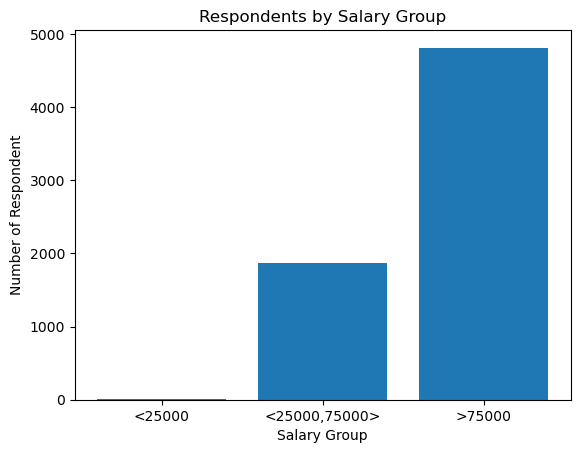

In [46]:
#Creating a bar chart to show the salary distribution among respondents
grouped_data = df3.groupby('Salary Group').size().reset_index(name='RowCount')

plt.bar(grouped_data['Salary Group'], grouped_data['RowCount'])
plt.xlabel('Salary Group')
plt.ylabel('Number of Respondent')
plt.title('Respondents by Salary Group')
plt.show()